In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
LABELS=["0.4","0.2","0.6"]

In [1]:
data = pd.read_excel(r'C:\Users\Patil\Desktop\Book1.xlsx')
data.head()

NameError: name 'pd' is not defined

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Feed Rate          20 non-null     int64
 1   Rotational Rate    20 non-null     int64
 2   Depth of cut       20 non-null     int64
 3   Surface Roughness  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [10]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Depth of cut"]]
# Store the variable we are predicting 
target = "Surface Roughness"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(20, 3)
(20,)


Text(0, 0.5, 'Frequency')

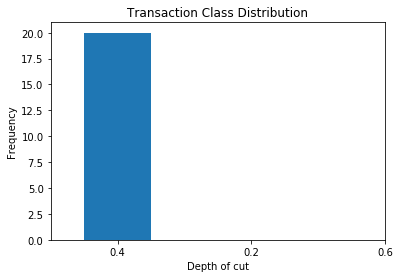

In [11]:
count_classes = pd.value_counts(data['Depth of cut'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(3), LABELS)

plt.xlabel("Depth of cut")

plt.ylabel("Frequency")

In [12]:
DOC1 = data[data['Depth of cut']==0]
DOC2 = data[data['Depth of cut']==1]
DOC3 = data[data['Depth of cut']==2]

In [13]:
print(DOC1.shape,DOC2.shape,DOC3.shape)

(20, 4) (0, 4) (0, 4)


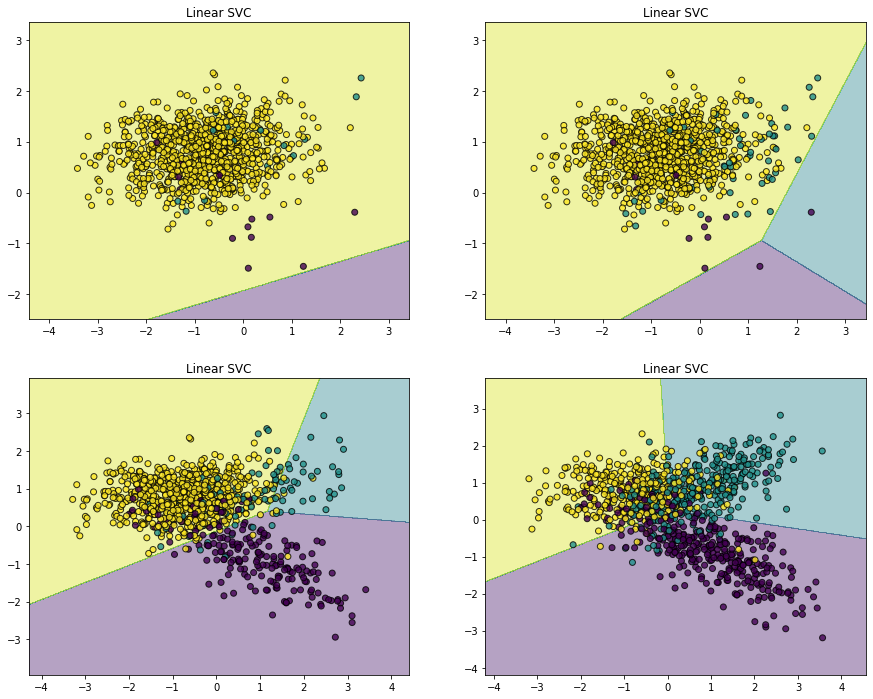

In [14]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification

def create_dataset(n_samples=1000, weights=(0.4, 0.2, 0.6), n_classes=3,
                   class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

def plot_decision_function(X, y, clf, ax):
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.01, 0.01, 0.98), (0.01, 0.05, 0.94),
               (0.2, 0.1, 0.7), (0.33, 0.33, 0.33))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(n_samples=1000, weights=weights)
    clf = LinearSVC().fit(X, y)
    plot_decision_function(X, y, clf, ax)
    ax.set_title('Linear SVC')

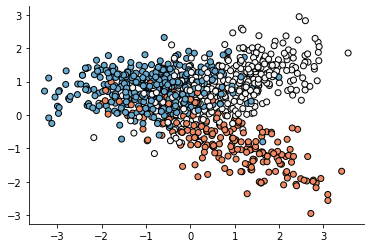

In [15]:
import seaborn as sns
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.2, 0.4, 0.8],
                           class_sep=0.8, random_state=0)

import matplotlib.pyplot as plt
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig = plt.Figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()

In [16]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ModuleNotFoundError: No module named 'imblearn'

In [17]:
ros = RandomUnderSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output")
pass

NameError: name 'RandomUnderSampler' is not defined

In [18]:
from sklearn import datasets, linear_model, metrics
  
# load the digit dataset
digits = datasets.load_digits()
  
# defining feature matrix(X) and response vector(y)
X = digits.data
y = digits.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)
  
# create logistic regression object
reg = linear_model.LogisticRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = reg.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):",
metrics.accuracy_score(y_test, y_pred)*100)


Logistic Regression model accuracy(in %): 96.88888888888889


C:\Users\Patil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0, 36,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 46,  0,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 46]], dtype=int64)

In [20]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

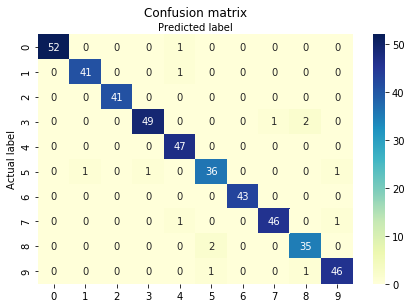

In [21]:
 class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9688888888888889


In [23]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.3888888888888889


In [24]:
data.shape

(20, 4)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Feed Rate          20 non-null     int64
 1   Rotational Rate    20 non-null     int64
 2   Depth of cut       20 non-null     int64
 3   Surface Roughness  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [26]:
data.describe()

,Feed Rate,Rotational Rate,Depth of cut,Surface Roughness
count,20.0,20.000000,20.0,20.000000
mean,0.0,16.500000,0.0,57.250000
std,0.0,17.614288,0.0,16.029167
min,0.0,3.000000,0.0,32.000000
25%,0.0,3.000000,0.0,47.000000
50%,0.0,9.000000,0.0,54.000000
75%,0.0,22.500000,0.0,66.750000
max,0.0,45.000000,0.0,91.000000


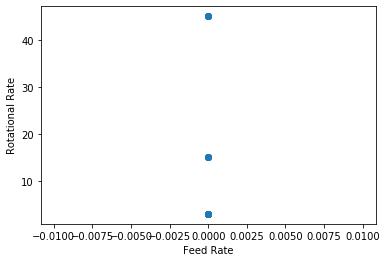

In [27]:
sns.regplot(x='Feed Rate',y='Rotational Rate',data=data)

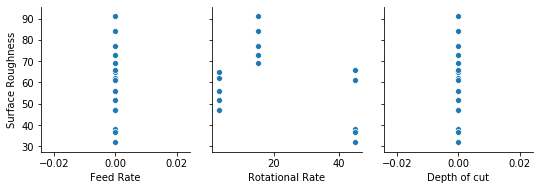

In [28]:
sns.pairplot(data=data,
             x_vars=['Feed Rate','Rotational Rate','Depth of cut'],
             y_vars='Surface Roughness')

In [29]:
data.corr()

,Feed Rate,Rotational Rate,Depth of cut,Surface Roughness
Feed Rate,NaN,NaN,NaN,NaN
Rotational Rate,NaN,1.000000,NaN,-0.168049
Depth of cut,NaN,NaN,NaN,NaN
Surface Roughness,NaN,-0.168049,NaN,1.000000


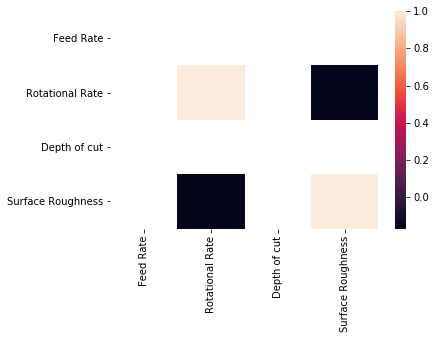

In [30]:
sns.heatmap(data.corr())

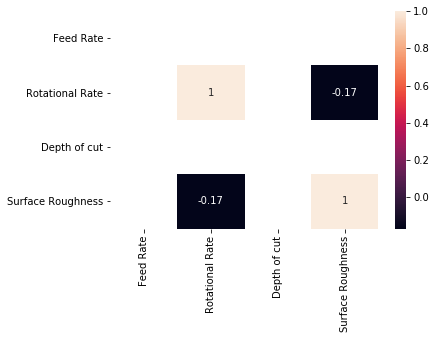

In [31]:
sns.heatmap(data.corr(),annot=True)

In [32]:
X = data['Feed Rate']
y = data['Rotational Rate']

In [33]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=100)
#X_train, X_test, y_train, y_test
X_train.shape
X_test.shape

(6,)

In [34]:
X_train

16    0
1     0
9     0
14    0
12    0
5     0
2     0
4     0
10    0
0     0
15    0
7     0
3     0
8     0
Name: Feed Rate, dtype: int64

In [35]:
# training the model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,Feed Rate
16,1.0,0
1,1.0,0
9,1.0,0
14,1.0,0
12,1.0,0


In [36]:
# fitting the model
# ols-ordinary least squares
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const        16.285714
Feed Rate     0.000000
dtype: float64

In [37]:
lr_model.summary()

C:\Users\Patil\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
C:\Users\Patil\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1827: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\Patil\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Patil\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Patil\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Patil\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Rotational Rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 07 Feb 2022   Prob (F-statistic):                nan
Time:                        20:59:16   Log-Likelihood:                -58.597
No. Observations:                  14   AIC:                             119.2
Df Residuals:                      13   BIC:                             119.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2857      4.411      3.692      0.003       6.757      25.815
Feed Rate           0          0        nan        nan           0           0
==============================================================================
Omnibus:                        3.566   Durbin-Watson:                   2.694
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                2.540
Skew:                           1.011   Prob(JB):                        0.281
Kurtosis:                       2.486   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""